In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing

In [2]:
data = fetch_california_housing()
X = data['data']
col_names = data['feature_names']
y = data['target']
df = pd.DataFrame(X,columns = col_names)

In [3]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
## variance threshold
from sklearn.feature_selection import VarianceThreshold
var_thresh = VarianceThreshold(threshold = 0.1)
transformed_data = var_thresh.fit_transform(df)

In [5]:
## remove highly correlated features
df.loc[:,'MedInc_sqrt'] = df.MedInc.apply(np.sqrt)
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc_sqrt
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.984329
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,-0.132797
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.326688
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.066910
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,0.018415
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,0.015266
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.084303
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.015569
MedInc_sqrt,0.984329,-0.132797,0.326688,-0.066910,0.018415,0.015266,-0.084303,-0.015569,1.000000


In [6]:
from feature_selection import UnivariateFeatureSelection

In [7]:
ufs = UnivariateFeatureSelection(n_features =1,
                                problem_type = 'regression',
                                scoring = 'f_regression')

In [8]:
ufs.fit(X,y)

SelectKBest(k=1, score_func=<function f_regression at 0x7fe8f2627050>)

In [9]:
X_transformed = ufs.transform(X)

In [10]:
X_transformed.shape

(20640, 1)

In [11]:
X.shape

(20640, 8)

In [12]:
from greedy import GreedyFeatureSelection
from sklearn.datasets import make_classification

In [13]:
X,y = make_classification(n_samples = 1000, n_features = 100)

X_transformed , scores = GreedyFeatureSelection()(X,y)

exit


### Recursive feature elimination

In [46]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt

In [36]:
data = fetch_california_housing()
X = data['data']
col_names = data['feature_names']
y = data['target']

In [37]:
model = LinearRegression()
rfe = RFE(estimator = model,
         n_features_to_select = 3)

rfe.fit(X,y)

X_transformed = rfe.transform(X)

In [38]:
X_transformed.shape

(20640, 3)

In [39]:
X.shape

(20640, 8)

In [40]:
model = RandomForestRegressor()
model.fit(X,y)

RandomForestRegressor()

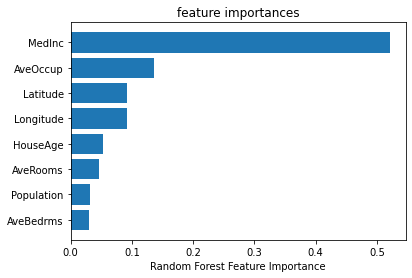

In [53]:
importances = model.feature_importances_
idxs = np.argsort(importances)
plt.title('feature importances')
plt.barh(range(len(idxs)),importances[idxs],align = 'center')
plt.yticks(range(len(idxs)),[col_names[i] for i in idxs])
plt.xlabel('Random Forest Feature Importance')
plt.show()

### select from model

In [61]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
# fetch a regression dataset
# in diabetes data we predict diabetes progression # after one year based on some features
data = load_diabetes()
X = data["data"]
col_names = data["feature_names"]
y = data["target"]
# initialize the model
model = RandomForestRegressor()


In [79]:
sfm = SelectFromModel(estimator = model,max_features = 3,threshold = 0.01)

In [80]:
X_transformed = sfm.fit_transform(X,y)

In [81]:
support = sfm.get_support()

In [82]:
print([
    x for x,y in zip(col_names,support) if y == True
])

['bmi', 'bp', 's5']
